In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [14]:
# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

#Create client features set for which we will be predicting price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

In [15]:
 CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

In [16]:
#Load Boston housing data in city_data vaiable
city_data = datasets.load_boston()
#initialize housing prices and features
housing_prices = city_data.target
housing_features = city_data.data
print("Boston Housing dataset loaded successfully!")

Boston Housing dataset loaded successfully!


In [17]:
#Total houses in dataset
total_houses = housing_features.shape[0]
#No of features in dataset
total_features = housing_features.shape[1]
#Min value of house
minimum_price = np.amin(housing_prices)
#Max value of house
maximum_price = np.amax(housing_prices)
#Mean value of house
mean_price = np.mean(housing_prices)
#Median value of house
median_price = np.median(housing_prices)
# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)
# Show the calculated statistics
print("Boston Housing dataset statistics (in $1000's):\n")
print("Total number of houses:", total_houses)
print("Total number of features:", total_features)
print("Minimum house price:", minimum_price)
print("Maximum house price:", maximum_price)
print("Mean house price: {0:.3f}".format(mean_price))
print("Median house price:", median_price)
print("Standard deviation of house price: {0:.3f}".format(std_dev))

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


In [18]:
print(CLIENT_FEATURES)

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


In [19]:
from sklearn.cross_validation import train_test_split
def shuffle_split_data(X,y):
     # Shuffle and split the data
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
     #return train and test subsets
    return X_train,y_train,X_test,y_test    
# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print("Successfully shuffled and split the data!")
except:
    print("Something went wrong with shuffling and splitting the data.")
    

Successfully shuffled and split the data!


In [20]:
from sklearn.metrics import mean_squared_error
def performance_metric(y_true,y_predict):
    error = mean_squared_error(y_true,y_predict)
    return error
try:
    total_error= mean_squared_error(y_train,y_train)
    print("Successfully performed a metric calculation!")
except:
    print("Something went wrong")

Successfully performed a metric calculation!


In [21]:
from sklearn.metrics import make_scorer
from sklearn import svm, grid_search, datasets
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
def fit_model(X,y):
    #Create a decision tree regressor object
    regressor = DecisionTreeRegressor()
    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
    # Make an appropriate scoring function
    scoring_function = make_scorer(performance_metric, greater_is_better=False)
    # Make the GridSearchCV object
    reg = grid_search.GridSearchCV(regressor, parameters, scoring_function)
    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)
    # Return the optimal model
    return reg.best_estimator_

# Test fit_model on entire dataset

try:
    reg = fit_model(housing_features, housing_prices)
    print("Successfully fit a model!")
except:
    print("Something went wrong with fitting a model.")
    

Successfully fit a model!


In [23]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print("Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .")
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [1]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print("Creating a model complexity graph. . . ")

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


C:\Users\vapte\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


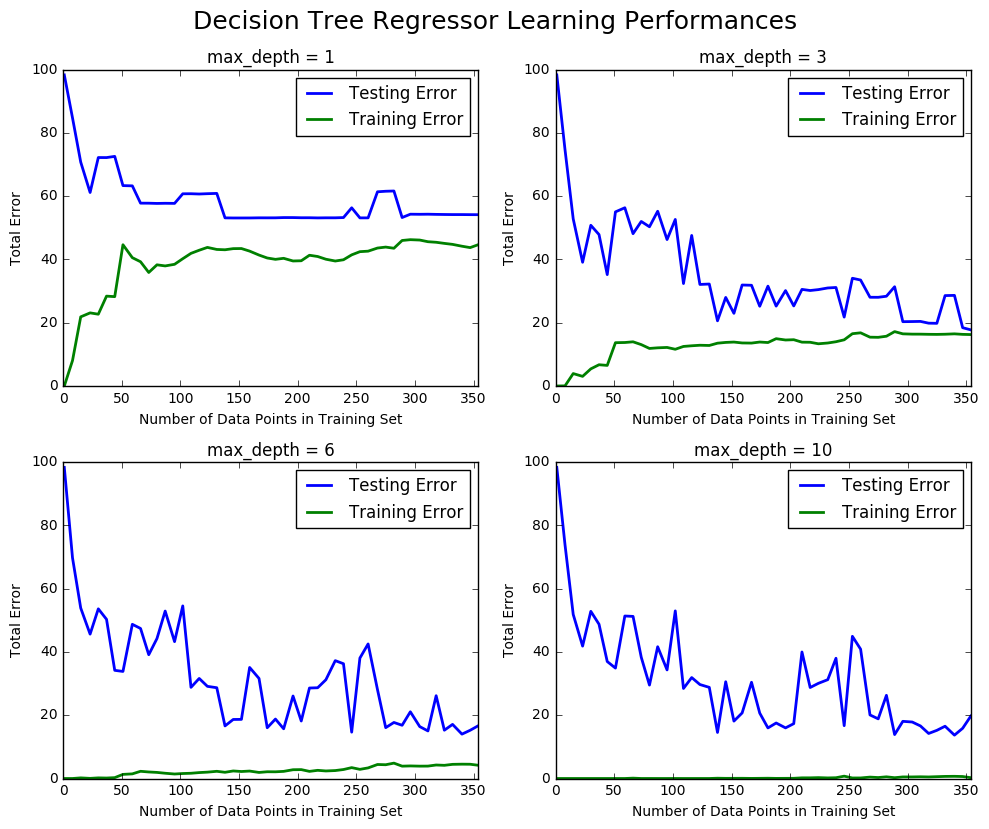

In [25]:
#Analyzing model performance
learning_curves(X_train, y_train, X_test, y_test)

Creating a model complexity graph. . . 


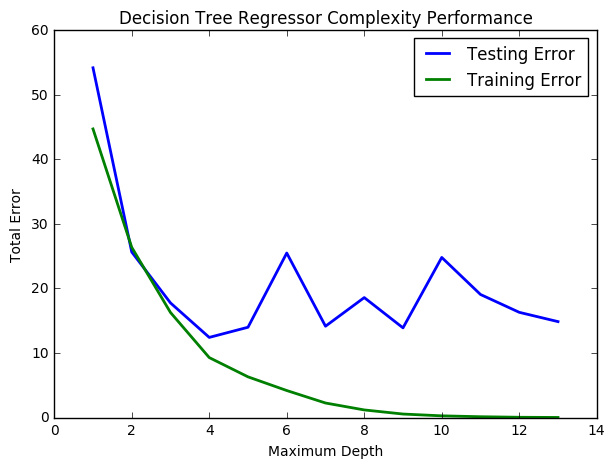

In [26]:
model_complexity(X_train, y_train, X_test, y_test)

In [27]:
print ("Final model has an optimal max_depth parameter of", reg.get_params()['max_depth'])

Final model has an optimal max_depth parameter of 7


In [29]:
sale_price = reg.predict(CLIENT_FEATURES)
print ("Predicted value of client's home: {0:.3f}",sale_price[0])

Predicted value of client's home: {0:.3f} 19.9974683544
